In [1]:
import time
from selenium import webdriver

In [2]:
from selenium.webdriver import ChromeOptions
options = ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome("/Users/dayoung/chromedriver", options=options)

In [3]:
url = "https://www.youtube.com/watch?v=XrIaJayElnw"
driver.get(url)
time.sleep(3)

In [4]:
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
driver.execute_script("window.scrollTo(0, 500);") # 댓글영역이 조금 보이도록 스크롤
time.sleep(1)

In [5]:
driver.find_element_by_css_selector("div#icon-label").click() # 정렬 기준 클릭
time.sleep(1)
driver.find_element_by_css_selector("a[tabindex='-1'] div.item").click() # 정렬 기준  > 최근 날자순 클릭

In [6]:
print(last_page_height)

2191


In [7]:
import time
page_count = 0
while True:
    scroll_script = "window.scrollTo(0, document.documentElement.scrollHeight);"
    driver.execute_script(scroll_script)
    time.sleep(3)
    scroll_height = "return document.documentElement.scrollHeight"
    new_page_height = driver.execute_script(scroll_height)
    
    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height   
    
    if page_count > 10:
        break
    else:
        page_count += 1


In [8]:
html_source = driver.page_source
driver.close()

In [9]:
from bs4 import BeautifulSoup

In [10]:
print(html_source[:100])

<html style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" lang="ko-KR" system-icons="" t


In [11]:
soup = BeautifulSoup(html_source, "html.parser")

In [12]:
comments = soup.select("yt-formatted-string#content-text")
len(comments)

260

In [13]:
comments[0].text

'🤤❤️❤️'

In [14]:
users = soup.select("a#author-text > span") # div#header-author a > span
len(users)

260

In [15]:
users[0].text.strip() # strip는 텍스트 앞/뒤 공백 제거

'ธนวินท์ แผงศรี'

In [16]:
user_list = [ user.text.strip() for user in users]

In [17]:
comment_list = [ comment.text.strip() for comment in comments]

In [18]:
import pandas as pd
import numpy as np
comment_df = pd.DataFrame(np.c_[user_list, comment_list], columns=["user", "comment"])

In [19]:
comment_df.head()

,user,comment
0,ธนวินท์ แผงศรี,🤤❤️❤️
1,Jerry Vanchhawng,its Christmas time 💟💟💟
2,Jerry Vanchhawng,i LOVE YOU JISOO
3,Bia Alice,🥰🥰🥰🥰❤️❤️❤️
4,♣️ JĪŠØØ ♣️,Blackpink 🖤💖


In [20]:
comment_df.to_csv("comment.csv", encoding="utf-8-sig", index=False)

#### 어제수집한 유튜브 댓글(최근 comments10페이지 정도)
#### nltk를 이용해서 토큰화(정규표현식이용)
#### 형태소 분석(품사태깅)
#### 가장많이 언급된 단어(명사만 찾기)

In [46]:
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer("[\w]+")
from nltk.tag import pos_tag
comment_tokens = comment_df["comment"].map(ret.tokenize)
comment_tags = comment_tokens.map(pos_tag)

In [39]:
comment_list = comment_tags.values.tolist() #태그를 리스트 형태로 바꾸어줌

In [40]:
type(comment_list)

list

In [47]:
from itertools import chain #넘파이를 이용할 수 도 있음! 다양한 방법으로 시도해보자... 그치만 모르겠는걸?
comment_list = list(chain.from_iterable(comment_list))
print(comment_list)

['its', 'PRP$', 'Christmas', 'NNP', 'time', 'NN', 'i', 'NN', 'LOVE', 'NNP', 'YOU', 'NNP', 'JISOO', 'NNP', 'Blackpink', 'NN', 'Hi', 'NNP', 'September', 'NNP', 'bye', 'NN', 'August', 'NNP', 'Jisoo', 'NNP', 'so', 'RB', 'cute', 'JJ', 'bagus', 'NN', 'banget', 'NN', 'dah', 'NN', 'sumpah', 'NN', 'semua', 'NN', 'Omg', 'NNP', 'eeekk', 'NN', 'Jisoo', 'NNP', 'are', 'VBP', 'so', 'RB', 'cute', 'JJ', 'Mine', 'NNP', 'bias', 'NN', 'BLACKPINK', 'NNP', 'is', 'VBZ', 'best', 'JJS', 'forever', 'RB', 'Jisoo', 'NNP', 's', 'JJ', 'voice', 'NN', 'so', 'RB', 'cute', 'JJ', 'Rosé', 'NNP', 'is', 'VBZ', 'so', 'RB', 'cute', 'JJ', 'when', 'WRB', 'she', 'PRP', 'was', 'VBD', 'hungry', 'JJ', 'always', 'RB', 'was', 'VBD', 'cute', 'JJ', 'they', 'PRP', 'sound', 'VBP', 'like', 'IN', 'minions', 'NNS', 'Jisoo', 'NNP', 'is', 'VBZ', 'so', 'RB', 'cute', 'JJ', 'Anyone', 'NN', 'else', 'RB', 'watching', 'VBG', 'this', 'DT', 'after', 'IN', '3', 'CD', 'years', 'NNS', 'Rose', 'NNP', 'sooooo', 'VBD', 'cuteeeeeeeee', 'NNS', 'So', 'RB', '

In [50]:
import re
pattern = re.compile("NN?")
comment_nouns = [ t[0] for t in comment_list if pattern.match(t[1])]

IndexError: string index out of range

In [ ]:
comment_nouns = list(map(lambda x : x.lower(), comment_nouns)) #모두 소문자로 바꿈
#[x.lower() for x in comment_nouns]

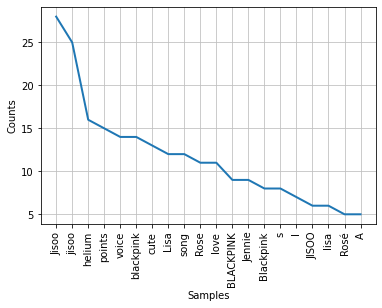

In [45]:
from nltk import Text
comment_text = Text(comment_nouns)
comment_text.plot(20)